In [1]:
import pandas as pd
import numpy as np

In [3]:
#loading the dataset
df = pd.read_csv('Information.csv', engine ='python')

## Feature Selection

In [76]:
#features selected

#the features which are not required are dropped
df = df.drop(columns = ['_unit_id','_golden','description','tweet_location','_unit_state','_trusted_judgments','_last_judgment_at','profile_yn','profile_yn_confidence','link_color','profileimage','tweet_coord','tweet_created','tweet_id','user_timezone'] )

#null values are filled with appropriate values
df.gender = df.gender.fillna(0)
df.gender_confidence = df.gender_confidence.fillna(1)
df.info() #Dataframe after 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20050 non-null  object 
 1   gender_confidence  20050 non-null  float64
 2   created            20050 non-null  object 
 3   fav_number         20050 non-null  int64  
 4   name               20050 non-null  object 
 5   retweet_count      20050 non-null  int64  
 6   sidebar_color      20050 non-null  object 
 7   text               20050 non-null  object 
 8   tweet_count        20050 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [77]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string

In [79]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

df['Clean_tweet'] = [cleaning(s) for s in df['text']]

list_of_stopwords = stopwords.words('English')
#df['text'] = df['text'].lower()
clean_text = []
for i in range (df.shape[0]):  #no. of rows
    current_tweet = df['Clean_tweet'].values[i]
    print("current_tweet :", current_tweet)
    tokenize_words = word_tokenize(current_tweet)
    clean_msg = ' '
    for word in tokenize_words:
         
        if not word in list_of_stopwords and word!=',' and word!='.' and word!='(' and word!=')' and word!='*' and word!='1' and word!='like' and word!='-' and word!='&' and word!='one' and word!='get' and word!='1' and word!='2' and word!='3' and word!='4' and word!='5' and word!='6' and word!='7' and word!='8'and word!='9'and word!='0'and word!=':' and word!='//'and word!='/'and word!=';' and word!= '&gt' and word!='@' and word!='#'and word!='!' and word!='url' and word!='%' and word!='t.co' and word!='I' and word!='?' and word!= '<' and word!='>':
             clean_msg += " "+ word
    print("clean_msg :", clean_msg)
    
    clean_text.append(clean_msg)
    print(len(clean_text))

    


    

current_tweet : robbie e responds to critics after win against eddie edwards in the worldtitleseries  t  nsybbmvjkz
clean_msg :   robbie e responds critics win eddie edwards worldtitleseries nsybbmvjkz
1
current_tweet :  ûïit felt like they were my friends and i was living the story with them û  t  arngeyhno retired ian  t  cizcanpqfz
clean_msg :   ûïit felt friends living story û arngeyhno retired ian cizcanpqfz
2
current_tweet : i absolutely adore when louis starts the songs it hits me hard but it feels good
clean_msg :   absolutely adore louis starts songs hits hard feels good
3
current_tweet : hi jordanspieth looking at the url do you use ifttt don t typically see an advanced user on the pgatour  t  houpel
clean_msg :   hi jordanspieth looking use ifttt typically see advanced user pgatour houpel
4
current_tweet : watching neighbours on sky catching up with the neighbs xxx ù äù äù äùôîù èùô ù è xxx
clean_msg :   watching neighbours sky catching neighbs xxx ù äù äù äùôîù èùô ù è xxx


current_tweet :  new unfollower in the last day via  t  ksasmdleb
clean_msg :   new unfollower last day via ksasmdleb
294
current_tweet : on the positive side i m learning to not be so butthurt over crap like i just tweeted imstillpathetic lol
clean_msg :   positive side learning butthurt crap tweeted imstillpathetic lol
295
current_tweet : found a transponder snail killer rabbits the amazing fauna of one winter island trecru  t  xgtvatl
clean_msg :   found transponder snail killer rabbits amazing fauna winter island trecru xgtvatl
296
current_tweet :  ûïthat ûªs the way you drop em û bigtits boobs tits  t  wvmjvxxd  t  hpexmwqx
clean_msg :   ûïthat ûªs way drop em û bigtits boobs tits wvmjvxxd hpexmwqx
297
current_tweet : when i m working out amp i m so exhausted i feel like breaking down any sec listening to hall of fame always gives me the kick i need to go onùõ ù 
clean_msg :   working amp exhausted feel breaking sec listening hall fame always gives kick need go onùõ ù
298
current_

clean_msg :   ever enough time day homework give ù ó
534
current_tweet : it s the final untdown to playoverwatch beta  t  olcanxjte
clean_msg :   final untdown playoverwatch beta olcanxjte
535
current_tweet :  artholier welme welme actually i m pretty nscious about it usually but i do it all the more lower than trash
clean_msg :   artholier welme welme actually pretty nscious usually lower trash
536
current_tweet : how to play the need for speed reboot five days early after some time away ea s need for speed franchise ret  t  piseiqj
clean_msg :   play need speed reboot five days early time away ea need speed franchise ret piseiqj
537
current_tweet :  lizziecaakes yeah ill send you the flier when i do it today stume party
clean_msg :   lizziecaakes yeah ill send flier today stume party
538
current_tweet :  theambassador you can t miss me lol  t  vytoivc
clean_msg :   theambassador miss lol vytoivc
539
current_tweet : cute fox bathing in the sun moyoulondon notd manicuremonday nailstamp

clean_msg :   craziest thing done public ûó oh wan na know eygecxszu
846
current_tweet :  shawnmendes ngrats to you you deserve all the awardsùõ ùõ ùõ ùõ 
clean_msg :   shawnmendes ngrats deserve awardsùõ ùõ ùõ ùõ
847
current_tweet : the world can pull you down with all its gravity 
clean_msg :   world pull gravity
848
current_tweet : alright damzadeleye keneamazu just having fun with the harsh tag marketmemonday ù ä 
clean_msg :   alright damzadeleye keneamazu fun harsh tag marketmemonday ù ä
849
current_tweet :  thefringthing harlequins for the harlequin god housewives to the housewife throne
clean_msg :   thefringthing harlequins harlequin god housewives housewife throne
850
current_tweet :  did you smell him allie asked creepily after the waiter filled my water glass
clean_msg :   smell allie asked creepily waiter filled water glass
851
current_tweet : uk car dealers fear the fallout of volkswagen scandal  t  fxeszetgp
clean_msg :   uk car dealers fear fallout volkswagen scandal fx

clean_msg :   broseffdylan ahh well associating bestie therefore interview ùñ excited
1158
current_tweet : ugh i can imagine all the krashlyn shippers going wild after seeing this  t  ackzbqpek
clean_msg :   ugh imagine krashlyn shippers going wild seeing ackzbqpek
1159
current_tweet :  nourryz i love the boys but their music doesn t dominate all other artistsùôû
clean_msg :   nourryz love boys music dominate artistsùôû
1160
current_tweet : spectre at hm another one this is the new normal for films to be on for a daft amount of time eh 
clean_msg :   spectre hm another new normal films daft amount time eh
1161
current_tweet : live the california dream hiring experience er nurse full time ce health careers glendale ca nursing job  t  ukowusnts
clean_msg :   live california dream hiring experience er nurse full time ce health careers glendale ca nursing job ukowusnts
1162
current_tweet :  bbclaurak now lady hollis if she wins this it will scupper the bill 
clean_msg :   bbclaurak lady ho

clean_msg :   blood money future ûó tislgxhj
1425
current_tweet : i m hoping the five year sanctioning agreement will help nascar make the schedule more diverse after  t  frpmtnvk
clean_msg :   hoping five year sanctioning agreement help nascar make schedule diverse frpmtnvk
1426
current_tweet : some lessons are only delivered in the form of pain
clean_msg :   lessons delivered form pain
1427
current_tweet :  sellingtheta not seeing the days to exp vix weeklies yet on tos are you 
clean_msg :   sellingtheta seeing days exp vix weeklies yet tos
1428
current_tweet : st cathrine s church hamburg the shaft of the tower is the send oldest upstanding building of û  t  zxostxgtg
clean_msg :   st cathrine church hamburg shaft tower send oldest upstanding building û zxostxgtg
1429
current_tweet :  moneytsa get the fuck out hereù âù âù â
clean_msg :   moneytsa fuck hereù âù âù â
1430
current_tweet :  robertbuckley googlefacts you always have the best answers
clean_msg :   robertbuckley googlefac

clean_msg :   look republican presidential candidate thinking africans ggjjbdeh
1721
current_tweet : i wish i had the money to go to tahoe for the first week of winter break and do some skiing ýá
clean_msg :   wish money go tahoe first week winter break skiing ýá
1722
current_tweet :  ashleyholly true they blocked the porsche opportunity this year if the news was true 
clean_msg :   ashleyholly true blocked porsche opportunity year news true
1723
current_tweet :  nonjob guardian bbc aljazeera saying the truth but it is against the zionist law in our untries i reiterate holocaust never happened
clean_msg :   nonjob guardian bbc aljazeera saying truth zionist law untries reiterate holocaust never happened
1724
current_tweet : antique henry the th sterling silver in cm groat ref  t  wccjlvps  t  tikwiqzui
clean_msg :   antique henry th sterling silver cm groat ref wccjlvps tikwiqzui
1725
current_tweet : longtime dc radio broadcaster ed walker dies at walker host of the big broadcast on su

current_tweet : not long now just more sleep until zusoclothing launch party amp fashion show at the old blind schoolù üùôêùõãùôïùôô vip press bloggers fashion
clean_msg :   long sleep zusoclothing launch party amp fashion show old blind schoolù üùôêùõãùôïùôô vip press bloggers fashion
1978
current_tweet : thanks for the recent follow willirikki bgardner varnavinav happy to nnect have a great monday via  t  mshpozna 
clean_msg :   thanks recent follow willirikki bgardner varnavinav happy nnect great monday via mshpozna
1979
current_tweet : i wonder what s the problem ùóùóùõ ù ù õ
clean_msg :   wonder problem ùóùóùõ ù ù õ
1980
current_tweet :  dannybreennl and the mayor noting that the vote isn t about implementing wifi but just looking at options and sts 
clean_msg :   dannybreennl mayor noting vote implementing wifi looking options sts
1981
current_tweet :  sainsburys i stupidly only brought one of these the other day and returned for another but none left do u have  t  dlgpljmznu
cle

clean_msg :   jchambersonline know whole teaching dynamic seems important season expected would touch
2255
current_tweet :  russian north korean and chinese hackers have repeatedly penetrated u s digital security  t  feorwgcptp
clean_msg :   russian north korean chinese hackers repeatedly penetrated u digital security feorwgcptp
2256
current_tweet : who s your pick for game of the world series are you a house divided we have your team spirit û  t  qxilvahkb
clean_msg :   pick game world series house divided team spirit û qxilvahkb
2257
current_tweet : chip kelly runs everything on the eagles but when asked why mathews didnt get the ball more he blamed duce staley hahaha bruh u a ward 
clean_msg :   chip kelly runs everything eagles asked mathews didnt ball blamed duce staley hahaha bruh u ward
2258
current_tweet : how to support the people that feed us everyday  t  nqjgdujjtj  t  rufkqftn
clean_msg :   support people feed us everyday nqjgdujjtj rufkqftn
2259
current_tweet : down with t

clean_msg :   imagine weeknd telling ppl rerd randomly right next drake industry parties haqwofhuh
2521
current_tweet : why nasir in the living room bumpin rude boy ù â
clean_msg :   nasir living room bumpin rude boy ù â
2522
current_tweet : obviously the latter two i doubt but there had to be a chance with villa mcfc
clean_msg :   obviously latter two doubt chance villa mcfc
2523
current_tweet : this nytimes editor dressed up as empire s okie lyon for her first week on the job  t  nwsihet  t  ctzeeeff
clean_msg :   nytimes editor dressed empire okie lyon first week job nwsihet ctzeeeff
2524
current_tweet :  kyiieswifi i was the first pls
clean_msg :   kyiieswifi first pls
2525
current_tweet : nfident did better on the aria charts than pentatonix 
clean_msg :   nfident better aria charts pentatonix
2526
current_tweet : in your eyes i see something more beautiful than the stars 
clean_msg :   eyes see something beautiful stars
2527
current_tweet :  thesweeper awwwwww bless you and your 

2812
current_tweet : chef radio on the internet a new way of listening dmz trendsetters  t  ajfdulzbn
clean_msg :   chef radio internet new way listening dmz trendsetters ajfdulzbn
2813
current_tweet : i don t care what anyone says the first hangover will be the funniest one of the three
clean_msg :   care anyone says first hangover funniest three
2814
current_tweet : nnamdi kanu and the cry for biafra by realffk  t  spliksrl radiobiafralive un hrw amnestyonline  t  vuknwzv
clean_msg :   nnamdi kanu cry biafra realffk spliksrl radiobiafralive un hrw amnestyonline vuknwzv
2815
current_tweet : the asterisk you used to declare a pointer is the same asterisk that you use for multiplication iostu intu
clean_msg :   asterisk used declare pointer asterisk use multiplication iostu intu
2816
current_tweet :  okrajones never under estimate the power of a hand written note bosca
clean_msg :   okrajones never estimate power hand written note bosca
2817
current_tweet : on the bright side of senior 

clean_msg :   everydaydayiloveyou forevermore ride edge seat hero û pushawardslizquens
3056
current_tweet : everydaydayiloveyou forevermore ride the edge of my seat with the hero û pushawardslizquens
clean_msg :   everydaydayiloveyou forevermore ride edge seat hero û pushawardslizquens
3057
current_tweet : the legend of zelda tri force heroes the kotaku review gaming  t  wyehjjuvh  t  cyethxvpz
clean_msg :   legend zelda tri force heroes kotaku review gaming wyehjjuvh cyethxvpz
3058
current_tweet : everydaydayiloveyou forevermore ride the edge of my seat with the hero û pushawardslizquens
clean_msg :   everydaydayiloveyou forevermore ride edge seat hero û pushawardslizquens
3059
current_tweet :  ntentmarketing the digital entrepreneur the dream of building a business around digital products  t  ouqbsl blogging
clean_msg :   ntentmarketing digital entrepreneur dream building business around digital products ouqbsl blogging
3060
current_tweet : everydaydayiloveyou forevermore ride the ed

3362
current_tweet : pd should the employee pay ni on private school fees  t  phxdsbj
clean_msg :   pd employee pay ni private school fees phxdsbj
3363
current_tweet : the other day i tried to me up w a curse word that was derived neither from religion nor sex and uldn t rebeccaroache thoughts 
clean_msg :   day tried w curse word derived neither religion sex uldn rebeccaroache thoughts
3364
current_tweet : i vered miles with my fitbit and earned the serengeti badge  t  sjrzbxzbpz
clean_msg :   vered miles fitbit earned serengeti badge sjrzbxzbpz
3365
current_tweet : until you cross the bridge of your insecurities you can t begin to explore your possibilities tim fargo quote
clean_msg :   cross bridge insecurities begin explore possibilities tim fargo quote
3366
current_tweet :  sonicdriver thejimmichaels i believe jensen said in the christmas episode jared actually spiked his eggnog 
clean_msg :   sonicdriver thejimmichaels believe jensen said christmas episode jared actually spiked e

clean_msg :   trevorboller feel way yesterday quite gloomy well yegwx
3585
current_tweet : sos sc story rn sums the band up pretty well tbh
clean_msg :   sos sc story rn sums band pretty well tbh
3586
current_tweet : charlie s angels beauty jaclyn smith turns  t  pbeqqqdi via eonline
clean_msg :   charlie angels beauty jaclyn smith turns pbeqqqdi via eonline
3587
current_tweet : loving all the autumnleaves cardiffskater repost cardiffskates  t  ylufw
clean_msg :   loving autumnleaves cardiffskater repost cardiffskates ylufw
3588
current_tweet :  silentsiris i know i d probably pick canada over the us given the choice
clean_msg :   silentsiris know probably pick canada us given choice
3589
current_tweet : the cavs have million in tax money and the sixers are paying their entire active roster million lmaooooo
clean_msg :   cavs million tax money sixers paying entire active roster million lmaooooo
3590
current_tweet : you can t make time so those who waste the least achieve the most tim f

clean_msg :   never halloween thing imma let
3804
current_tweet : you approach me with leslaw and i chop you in the throat i m protected by the law the urts woulda got u for assault with a deadly weapon
clean_msg :   approach leslaw chop throat protected law urts woulda got u assault deadly weapon
3805
current_tweet : came across this photo not mine but love to see photos around the space needle ù ü by wintertone  t  fyyxxzggv
clean_msg :   came across photo mine love see photos around space needle ù ü wintertone fyyxxzggv
3806
current_tweet :  steve hillaryclinton deportmitch right at least the house chambers weren ûªt being burned from the outside 
clean_msg :   steve hillaryclinton deportmitch right least house chambers ûªt burned outside
3807
current_tweet : gratitude is the first sign of a thinking rational creature solanus casey quote
clean_msg :   gratitude first sign thinking rational creature solanus casey quote
3808
current_tweet :  jakegraf on why trans men need more visibil

4020
current_tweet : dragon ûªs breath the easiest way to rake your leaves video  t  ttvxkguqqk chris eger
clean_msg :   dragon ûªs breath easiest way rake leaves video ttvxkguqqk chris eger
4021
current_tweet : at oow me see our presentation what ûªs the next crm ways to avoid being left behind no will keep you up at night booth 
clean_msg :   oow see presentation ûªs next crm ways avoid left behind keep night booth
4022
current_tweet : addington tabbed thegnac rviasgroup women s volleyball rookie of the week laserpride  t  mmkqnvvulo  t  tekveln
clean_msg :   addington tabbed thegnac rviasgroup women volleyball rookie week laserpride mmkqnvvulo tekveln
4023
current_tweet :  nowplaying the pains of being pure at heart higher than the stars  t  xknrzyb
clean_msg :   nowplaying pains pure heart higher stars xknrzyb
4024
current_tweet : number crunching for the past day new followers and no unfollowers stats via  t  phpoclxbe
clean_msg :   number crunching past day new followers unfollow

clean_msg :   engineering technology programs attending grad amp law fair wednesday tuislnrdu
4206
current_tweet :  silvam is at the nait job fair interviewing forest tech students  t  jozmakjc
clean_msg :   silvam nait job fair interviewing forest tech students jozmakjc
4207
current_tweet : who the fuck you really wanna be with besides me ù ùõù  t  khtugbke
clean_msg :   fuck really wan na besides ù ùõù khtugbke
4208
current_tweet :  onedirection artist of the year amas x
clean_msg :   onedirection artist year amas x
4209
current_tweet : at astleyclarke today with the great team who make amazing jewelry  t  whantxqxvu
clean_msg :   astleyclarke today great team make amazing jewelry whantxqxvu
4210
current_tweet : the impudence of rabiu kwakwanso and his fulani brothers by ffk written by femi fani kayode read below i  t  hulflvgk
clean_msg :   impudence rabiu kwakwanso fulani brothers ffk written femi fani kayode read hulflvgk
4211
current_tweet : sold this weekend in delray me in to t

clean_msg :   jayniek thanks follow beautiful
4430
current_tweet :  gwallaman wana experiment with the dog and shit llf  t  gmmyzhlodj
clean_msg :   gwallaman wana experiment dog shit llf gmmyzhlodj
4431
current_tweet : the one thing that uld make the difference between a successful biz and a  t  vhtdjtqrwt startup  t  qtjczjrsgs
clean_msg :   thing uld make difference successful biz vhtdjtqrwt startup qtjczjrsgs
4432
current_tweet : guy skips rocks on a frozen lake and disvers the olest sound on earth educate inspire change  t  bzfqgtgkmx
clean_msg :   guy skips rocks frozen lake disvers olest sound earth educate inspire change bzfqgtgkmx
4433
current_tweet :  regnizecj no i was in park and pressing on the gas to warm my car up in the morning and out of no where my engine sounded like it was
clean_msg :   regnizecj park pressing gas warm car morning engine sounded
4434
current_tweet : the sentiments of this article at spot on marketing and sales need to be hesive mollyreynolds  t  bnb

clean_msg :   best dad talkradio live mdzdoqp chained also itunes
4714
current_tweet :  rabeatkinsons which are the best ones xd
clean_msg :   rabeatkinsons best ones xd
4715
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
4716
current_tweet : the best is when i go to my doctors amp all the girls who work there say i m the happiest pregnant girl they ve ever seen amp im always glowingù ùõ 
clean_msg :   best go doctors amp girls work say happiest pregnant girl ever seen amp im always glowingù ùõ
4717
current_tweet :  loreecebezzina catch me boxh saturday st oct for the massive launch night amp halloween party  t  khzltanu
clean_msg :   loreecebezzina catch boxh saturday st oct massive launch night amp halloween party khzltanu
4718
current_tweet : the salsa mix on mega is making me go crazy bc i wanna go dancing so bad ù ù 
clean_msg :   salsa mix mega making go crazy bc wan na go dancing bad ù ù
4719
current_tweet : look at my

4965
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
4966
current_tweet :  shamelessrose that belt parkway is the worst 
clean_msg :   shamelessrose belt parkway worst
4967
current_tweet :  brookebcnn there s no one else in law enforcement to book you don t even agree w or like the way he goes about his talk
clean_msg :   brookebcnn else law enforcement book even agree w way goes talk
4968
current_tweet : naa officialkozzie is the one tho ùôî ùõø ùó 
clean_msg :   naa officialkozzie tho ùôî ùõø ùó
4969
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
4970
current_tweet : roy hargrove let the music speak for itself jazz quote
clean_msg :   roy hargrove let music speak jazz quote
4971
current_tweet : ain t nothing more important than the mulaaaaaa ù 
clean_msg :   nothing important mulaaaaaa ù
4972
current_tweet : get weather updates from the weather channel 
clean_msg :

clean_msg :   ûªm ready engage new follower past day know via pxdzeyycu
5178
current_tweet : this is the same building where an old lady offered to take me to her apt to teach me how to close a door properly i respectully declined 
clean_msg :   building old lady offered take apt teach close door properly respectully declined
5179
current_tweet : apple gets served with a lawsuit over wifi assist feature  t  ihitilcnp û
clean_msg :   apple gets served lawsuit wifi assist feature ihitilcnp û
5180
current_tweet : the ones we trusted the most pushed us far away 
clean_msg :   ones trusted pushed us far away
5181
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
5182
current_tweet : horrible and tragic story but i know reggie quoted in the article so i read everything in his very distinct voice  t  qgugjhf
clean_msg :   horrible tragic story know reggie quoted article read everything distinct voice qgugjhf
5183
current_tweet : don t 

clean_msg :   check social engagement wall ibmmobile booth scscafgf
5368
current_tweet : me join srlv s ûïfirst û women ûªs business mixer men welme register on the social register of las vegas site  t  kcbllyiac
clean_msg :   join srlv ûïfirst û women ûªs business mixer men welme register social register las vegas site kcbllyiac
5369
current_tweet : to purchase tickets online for the homeming celebration at durham marriott click here gt  t  amwbeev
clean_msg :   purchase tickets online homeming celebration durham marriott click gt amwbeev
5370
current_tweet :  bestinclassyt very informative tweet thanks for the info gg
clean_msg :   bestinclassyt informative tweet thanks info gg
5371
current_tweet :  ironbastion alexpinku i say finish one before jumping on to the next that s what i m doing at least with my thigh
clean_msg :   ironbastion alexpinku say finish jumping next least thigh
5372
current_tweet : domestic abuse inquiry call after deaths the family of a woman and her son murdere

current_tweet : artworks of tanja playner were published in the british vogue and gq magazine enjoy it also  t  gioqqelzv
clean_msg :   artworks tanja playner published british vogue gq magazine enjoy also gioqqelzv
5637
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
5638
current_tweet : the digital entrepreneur the dream of building a business around digital products and services is as old as t  t  cjxdmfy
clean_msg :   digital entrepreneur dream building business around digital products services old cjxdmfy
5639
current_tweet : oh how i love the kids who sit in sci tech and just play league
clean_msg :   oh love kids sit sci tech play league
5640
current_tweet :  nigelrefowens ngratulations nigel no surprise saving the best till last
clean_msg :   nigelrefowens ngratulations nigel surprise saving best till last
5641
current_tweet : shoutout to derekbrodland for the awesome profile pic  t  nkqjiuurrw
clean_msg :   shoutout d

5861
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
5862
current_tweet :  libdems have just made a massive step toward rehabilitation post alition by their lords standing up to the tories against taxcredits 
clean_msg :   libdems made massive step toward rehabilitation post alition lords standing tories taxcredits
5863
current_tweet : the gospel of greed how sardar biglari paid himself million despite lousy fund returns documents obtaine  t  kayugfa
clean_msg :   gospel greed sardar biglari paid million despite lousy fund returns documents obtaine kayugfa
5864
current_tweet :  swagmc hack me but the reality is u can t so lmao
clean_msg :   swagmc hack reality u lmao
5865
current_tweet : can you find male on the map just try it at  t  jdczdiha male
clean_msg :   find male map try jdczdiha male
5866
current_tweet :  jjiggaaa hell yeah jig idk if i wanna watch the show now that he s ripped ù he ulda hit either darrell for help w

clean_msg :   bumblecricket major changes previous side every time eng travel subntinent always carry subntinent rookies
6070
current_tweet : my mom made me order food and she picked it up the lady on the phone asked me if i had a ld i said yeah then the lady told my mom she
clean_msg :   mom made order food picked lady phone asked ld said yeah lady told mom
6071
current_tweet :  johnroderick danbenjamin the way of the future 
clean_msg :   johnroderick danbenjamin way future
6072
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6073
current_tweet : the smart home movement is gaining momentum an estimated million homes will enter this category by the end  t  crfghinfb
clean_msg :   smart home movement gaining momentum estimated million homes enter category end crfghinfb
6074
current_tweet :  richjava it might have been because she was an unrepentant slut who slept her way through the industry but that ûªs just my take û 
clean_

clean_msg :   weather updates weather channel
6325
current_tweet : what does the ideal retirement portfolio look like retirementinme retirefromhome  t  fwihaatlre
clean_msg :   ideal retirement portfolio look retirementinme retirefromhome fwihaatlre
6326
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6327
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6328
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6329
current_tweet :  earthtoryley let you know when it s closer to the show and relevant ù â
clean_msg :   earthtoryley let know closer show relevant ù â
6330
current_tweet : rhode island is breaking down the barriers between state and local government with a new data center  t  hvmgvxcr statesop
clean_msg :   rhode island breaking barriers state local government new data center hvmgvxcr statesop
6331
curre

clean_msg :   going caught hype halo waiting smythstoysuk llect midnightservercrash
6573
current_tweet : the end credit music for ahs asylum sounds so much like music in the forevermore maze at knott s scary farm 
clean_msg :   end credit music ahs asylum sounds much music forevermore maze knott scary farm
6574
current_tweet : check out the hottest girls at á  t  ofvhdt âé follow drrxe notmeatall  t  owzehhluuv
clean_msg :   check hottest girls á ofvhdt âé follow drrxe notmeatall owzehhluuv
6575
current_tweet : mrs pulley asked me if i saw the fight
clean_msg :   mrs pulley asked saw fight
6576
current_tweet : glenn beck lists off the republicans he uldn ûªt vote for û even if it was barack obama ûªs û  t  oqcvxmop  t  zpcyaqxl
clean_msg :   glenn beck lists republicans uldn ûªt vote û even barack obama ûªs û oqcvxmop zpcyaqxl
6577
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6578
current_tweet : get weather updates from th

clean_msg :   weather updates weather channel
6803
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6804
current_tweet : check out the largest pink diamond to ever be auctioned price tag starts at å m it s called a rare fancy v  t  cspupaivk
clean_msg :   check largest pink diamond ever auctioned price tag starts å called rare fancy v cspupaivk
6805
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
6806
current_tweet : my grandmother wanted me to call her just to tell me not to join the service because i should be finding a husband to take care of me ùªä
clean_msg :   grandmother wanted call tell join service finding husband take care ùªä
6807
current_tweet : vitalita no longer running in the at valparaiso sisracing
clean_msg :   vitalita longer running valparaiso sisracing
6808
current_tweet : mcdonalds after school is the best
clean_msg :   mcdonalds school best
6809
c

current_tweet :  shizzrod kyebillyion before the winter just gotta p the program and i m set got everything else
clean_msg :   shizzrod kyebillyion winter got ta p program set got everything else
7030
current_tweet : the taxi hap solicitor other yours llateral ilgfuex  t  nlefcwstwn
clean_msg :   taxi hap solicitor llateral ilgfuex nlefcwstwn
7031
current_tweet : so blair apologises for the illegal invasion subsequent chaos in iraq mere incidence he waits till he s made millions in the meantime 
clean_msg :   blair apologises illegal invasion subsequent chaos iraq mere incidence waits till made millions meantime
7032
current_tweet :  arenkennedy chloeaoper is it bad that this reminds me of the drake remake pizza pepperoni throwing vid
clean_msg :   arenkennedy chloeaoper bad reminds drake remake pizza pepperoni throwing vid
7033
current_tweet : just took a long walk on the beach while listening to hello by adele my life is a music video hair was blowing in the wind and everything
clean

clean_msg :   good job donombs mondrea mondreaus toplist real estate agents lyocgv
7244
current_tweet : asu does the f ckin most ù õ
clean_msg :   asu f ckin ù õ
7245
current_tweet : i uld probably fall asleep in sends if the world let me
clean_msg :   uld probably fall asleep sends world let
7246
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7247
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7248
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7249
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7250
current_tweet :  things you can do tonight to reverse the u s food crisis  t  gmanwolzg
clean_msg :   things tonight reverse u food crisis gmanwolzg
7251
current_tweet : part of the reason why i don t tweet as much is the auto rrect feature on my ce

current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7456
current_tweet :  a new blouson tankini from the swimwear great for camouflaging anything we may want to hide  t  ficjdbtbk
clean_msg :   new blouson tankini swimwear great camouflaging anything may want hide ficjdbtbk
7457
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7458
current_tweet : we re in the holiday spirit this saturday from am pm enjoy for lazertag missions then join us for  t  befbmzcjsd
clean_msg :   holiday spirit saturday pm enjoy lazertag missions join us befbmzcjsd
7459
current_tweet : there are a few more days left to enter your kids to be the caterpillar of the month to enter just share a  t  yzzlrzvc
clean_msg :   days left enter kids caterpillar month enter share yzzlrzvc
7460
current_tweet : me enter the bargnhtress trick or treat giveaway hop and win a amazon gift card  t  zvrudcea
clean_msg

clean_msg :   harrisonhayes yes harrison shit shit typo buddy
7661
current_tweet : after the greatsouthrun amazing sunrise and ended with this amazing sunset and a ld beer thank you to everyone  t  syerwpae
clean_msg :   greatsouthrun amazing sunrise ended amazing sunset ld beer thank everyone syerwpae
7662
current_tweet : nice to see the cricket team have some fight
clean_msg :   nice see cricket team fight
7663
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7664
current_tweet : well shit looks like girl band had to cancel their whole stateside tour i hope the health problems keeping them home aren t too serious 
clean_msg :   well shit looks girl band cancel whole stateside tour hope health problems keeping home serious
7665
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
7666
current_tweet : gambit the prodigy chronicles book by c l denault carydenault  t  bmnuuwx

clean_msg :   wishing happiest birthdays keithurbanùöùöùö wqzlwhe
7881
current_tweet : the only important difference between wonder woman and captain america  t  qcxsyxqi via tenordad
clean_msg :   important difference wonder woman captain america qcxsyxqi via tenordad
7882
current_tweet : just listened to walls and its good the mv is aesthetic
clean_msg :   listened walls good mv aesthetic
7883
current_tweet : was about to tailgate the shit out of this slow ass car till i saw a lack if plates a cage and a light bar underverasshole
clean_msg :   tailgate shit slow ass car till saw lack plates cage light bar underverasshole
7884
current_tweet :  vrizov don t wanna spoil anything but let s just say that there are some pretty horrifying montages in the send act
clean_msg :   vrizov wan na spoil anything let say pretty horrifying montages send act
7885
current_tweet :  t  miyauisod like and subscribe to the channel  t  sahrqecef
clean_msg :   miyauisod subscribe channel sahrqecef
7886
curr

current_tweet : how to vote for the american music awards  t  ixmybx via theamas
clean_msg :   vote american music awards ixmybx via theamas
8090
current_tweet : video photoshoot of hilaryduff for the glamourmex november issue behind the scenes  t  xgklryxqhc  t  lpeoos
clean_msg :   video photoshoot hilaryduff glamourmex november issue behind scenes xgklryxqhc lpeoos
8091
current_tweet :  jibjaneen demijolras it s my dearest angelica vs my dearest angelica and back then ppl would rly mmonly write the first one
clean_msg :   jibjaneen demijolras dearest angelica vs dearest angelica back ppl would rly mmonly write first
8092
current_tweet : unmanned vessels the future is now  t  ndyiuyd
clean_msg :   unmanned vessels future ndyiuyd
8093
current_tweet : hbd tori ùöù i hope you are having a good day i know we aren t the bestest of friends but you re still my friend and i love ya crazy self
clean_msg :   hbd tori ùöù hope good day know bestest friends still friend love ya crazy self
8094
c

clean_msg :   sadsackjetsfan stamkos deserves play wherever give cash actually deserves kane dosent belong sentence
8402
current_tweet : no matter the occasion big or small formal business or casual friday we do it all when it mes to av lorado events
clean_msg :   matter occasion big small formal business casual friday mes av lorado events
8403
current_tweet : demos against govermnet set for tomorrow the lilongwe city uncil in malawi s capital has given human rights  t  zfjlddfo
clean_msg :   demos govermnet set tomorrow lilongwe city uncil malawi capital given human rights zfjlddfo
8404
current_tweet : modern family is the best
clean_msg :   modern family best
8405
current_tweet : working on negative vibes only gear let s keep the focus on our message of negativity rather than the design aspect drownedxo
clean_msg :   working negative vibes gear let keep focus message negativity rather design aspect drownedxo
8406
current_tweet : new whiteboard messages from the young guys cbcmountain

current_tweet :  sextip squeeze the dick right before he s cums make his legs shake xxx sex  t  jjgoulp
clean_msg :   sextip squeeze dick right cums make legs shake xxx sex jjgoulp
8687
current_tweet :  t  miyauisod like and subscribe to the channel  t  fdwgpmxsx
clean_msg :   miyauisod subscribe channel fdwgpmxsx
8688
current_tweet :  sungohst the fact he was is a bit feminine does not make him a girl holy shit what a ncept 
clean_msg :   sungohst fact bit feminine make girl holy shit ncept
8689
current_tweet :  ffstv i ve only played a little bit so far and ive enjoyed all the ac games so far but this one isnt grabbing me yet
clean_msg :   ffstv played little bit far ive enjoyed ac games far isnt grabbing yet
8690
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
8691
current_tweet :  niallalmightyx no i m mean i m at the ncert aloneù âx
clean_msg :   niallalmightyx mean ncert aloneù âx
8692
current_tweet : get weather updates

clean_msg :   miyauisod subscribe channel jvmgglhkwl
8979
current_tweet : this is the greatest picture on the internet  t  xdky
clean_msg :   greatest picture internet xdky
8980
current_tweet : found a transponder snail get an inside look at the ever cheerful buggy pirates trecru  t  yphuvuc
clean_msg :   found transponder snail inside look ever cheerful buggy pirates trecru yphuvuc
8981
current_tweet : i did it i found the sketchiest dentist in the tri state area  t  tzznmxormb
clean_msg :   found sketchiest dentist tri state area tzznmxormb
8982
current_tweet :  angelaintha a clockwork orange million dollar baby the warriors rpse bride rocky a space odyssey
clean_msg :   angelaintha clockwork orange million dollar baby warriors rpse bride rocky space odyssey
8983
current_tweet :  jaymohr carnac envelope the winning percentage and points given up by the afc south this weekend jaymohrsports
clean_msg :   jaymohr carnac envelope winning percentage points given afc south weekend jaymohrs

clean_msg :   thewssholmes anythingbatch silly name use check hotel rooms ingnito ever thinks real
9240
current_tweet : oh man this is interesting i thought i was the only one i feel bad for the kid who i hit in the face when i  t  sgdzgqthm
clean_msg :   oh man interesting thought feel bad kid hit face sgdzgqthm
9241
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
9242
current_tweet :  paulmwatson wonder what the differences are between apple tv amp netflix in ireland mpare to the states 
clean_msg :   paulmwatson wonder differences apple tv amp netflix ireland mpare states
9243
current_tweet : i have a rising follower graph more follower in the past day get your stats right here  t  jopgmytm
clean_msg :   rising follower graph follower past day stats right jopgmytm
9244
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
9245
current_tweet : get weather updates from the

clean_msg :   life good weather beautiful happymonday fall ù âùõï elkhart indiana dcjrzxappm
9535
current_tweet :  sexygoddamon hw many times has stefan treated u like shit as opposed to that one time that enzo said that statement as a result of the fact
clean_msg :   sexygoddamon hw many times stefan treated u shit opposed time enzo said statement result fact
9536
current_tweet : feel more tired with hours of rest than i did with hours on the weekend  t  uogufay
clean_msg :   feel tired hours rest hours weekend uogufay
9537
current_tweet : stats for the day have arrived new unfollower stats via  t  alpfr 
clean_msg :   stats day arrived new unfollower stats via alpfr
9538
current_tweet : i ve been in this damn office for the past hrs i m starving and cranky and i just want to go home 
clean_msg :   damn office past hrs starving cranky want go home
9539
current_tweet :  uzeekhanjee so the saying is true every successful man has a lady behind we can surely see it today 
clean_msg :   uz

clean_msg :   another photo show detail superb craftsmanship fenders cedarrocket û ycnkenp
9791
current_tweet : get weather updates from the weather channel 
clean_msg :   weather updates weather channel
9792
current_tweet : michigan don t miss us tonight in pontiac at the pike room tickets here  t  zszdeb  t  yniyqbwl
clean_msg :   michigan miss us tonight pontiac pike room tickets zszdeb yniyqbwl
9793
current_tweet :  tweeps followed me in the past day feels great do you also want to feel awesome check out  t  eynlvfhn
clean_msg :   tweeps followed past day feels great also want feel awesome check eynlvfhn
9794
current_tweet : news at accent training has skyrocketed to the highest grossing business in texas following the new gun laws  t  drpbjr
clean_msg :   news accent training skyrocketed highest grossing business texas following new gun laws drpbjr
9795
current_tweet :  tweeps unfollowed goodbye me in the past day thank you  t  deytvj 
clean_msg :   tweeps unfollowed goodbye past 

clean_msg :   dis hammer pants quoteoftheday guys quote day
10122
current_tweet : i need to do something for halloween i went as decent human being last year and everyone thought i was terminally ill 
clean_msg :   need something halloween went decent human last year everyone thought terminally ill
10123
current_tweet : hey man i saw you earlier i was with linas and tom imatoplad
clean_msg :   hey man saw earlier linas tom imatoplad
10124
current_tweet :  disgruntledmom i may have reopened the sent email and read it two or three ugh three or four ugh times 
clean_msg :   disgruntledmom may reopened sent email read two three ugh three four ugh times
10125
current_tweet : shark circulation check out the sinus venosus and all that pooled blood waiting to get into the heart ichthyology  t  ihserzvm
clean_msg :   shark circulation check sinus venosus pooled blood waiting heart ichthyology ihserzvm
10126
current_tweet : beer ntains a chemical that may slow down the effects of alzheimer s and

10346
current_tweet : the one direction fandom is so fucking nice i mean this is like my send family and if i need help people will dm me and it s just so nice
clean_msg :   direction fandom fucking nice mean send family need help people dm nice
10347
current_tweet :  ôäôôôô ø ûó don t forget to share your mments and feedbacks ùõï  t  rjllpjuqj
clean_msg :   ôäôôôô ø ûó forget share mments feedbacks ùõï rjllpjuqj
10348
current_tweet :  tips on saving electricity and lowering your electricity bill yycre  t  jidzoafbjb
clean_msg :   tips saving electricity lowering electricity bill yycre jidzoafbjb
10349
current_tweet :  mrsvannasdall creativeedtech that s wonderful and like jrippo we offer lifetime support remember check this out checkthisoutbr
clean_msg :   mrsvannasdall creativeedtech wonderful jrippo offer lifetime support remember check checkthisoutbr
10350
current_tweet : this whole nemi tour is giving me all the feels and they actually included san diego so no driving to la yay  ü

clean_msg :   himemelancholy ah well sometimes voices caught attention looked finding animes paid
10630
current_tweet : all this wind is blowing the lorful leaves off the trees after they just changed and patricia i swear to god take your bullshit elsewhere
clean_msg :   wind blowing lorful leaves trees changed patricia swear god take bullshit elsewhere
10631
current_tweet : there s this group of of freshman that stand in the middle of the hallway and don t move and i srsly wanna ram them overùªä
clean_msg :   group freshman stand middle hallway move srsly wan na ram overùªä
10632
current_tweet :  datahorrorstories with opera max and android authority  t  lnvdggzb datahorrorstories
clean_msg :   datahorrorstories opera max android authority lnvdggzb datahorrorstories
10633
current_tweet :  sdfofbc blizzardlynn like the old saying you leave work for a few days and look what happens xd
clean_msg :   sdfofbc blizzardlynn old saying leave work days look happens xd
10634
current_tweet : whe

10913
current_tweet : i m gonna spite you amp not raise celebrations but remind you of that night when we were tired and zoning out khanyigee cc owamzee
clean_msg :   gon na spite amp raise celebrations remind night tired zoning khanyigee cc owamzee
10914
current_tweet :  nothing it seemed uld survive the flood the profusion of darkness which creeping in at keyholes and crevices stole round window 
clean_msg :   nothing seemed uld survive flood profusion darkness creeping keyholes crevices stole round window
10915
current_tweet : get the idis in the sheets imma eat and go to sleep
clean_msg :   idis sheets imma eat go sleep
10916
current_tweet :  adamspink junipah i can certainly remmend it great visit been there a few times and i pass it every day 
clean_msg :   adamspink junipah certainly remmend great visit times pass every day
10917
current_tweet : exclusive zoe saldana and mar perego bring their twins to the pumpkinåêpatch  t  nmyaiicp  t  rpgcxhs
clean_msg :   exclusive zoe salda

current_tweet :  voidflame barabiredtata your in and current name never stop making me giggle and smile 
clean_msg :   voidflame barabiredtata current name never stop making giggle smile
11197
current_tweet : too much shaving and waxing will have your pussy feeling like the bottom of a timberland boot  t  asenzzklb
clean_msg :   much shaving waxing pussy feeling bottom timberland boot asenzzklb
11198
current_tweet : wash the wound ver with a plaster and take a pain killer unfortunately this remedy doesn t apply with the heart
clean_msg :   wash wound ver plaster take pain killer unfortunately remedy apply heart
11199
current_tweet :  awickedassassin ino giggled and opened her wings i m not a bunny i m a bat 
clean_msg :   awickedassassin ino giggled opened wings bunny bat
11200
current_tweet : glenn was the best and you killed him
clean_msg :   glenn best killed
11201
current_tweet : look at my lifetime crush and his luscious lips  t  pkxretrj
clean_msg :   look lifetime crush luscious

11489
current_tweet : people really hate leto as the joker and i think it s sort of bomb he s not heath ledger but he isn t supposed to be 
clean_msg :   people really hate leto joker think sort bomb heath ledger supposed
11490
current_tweet :  rbccanada i wish my new home is spacious near the water and in a good neighbourhood  t  wkpbibdd rbcfirsthome
clean_msg :   rbccanada wish new home spacious near water good neighbourhood wkpbibdd rbcfirsthome
11491
current_tweet : see our latest lamar  job and click to apply general manager in training retail  t  negmcblim retail hiring
clean_msg :   see latest lamar job click apply general manager training retail negmcblim retail hiring
11492
current_tweet : all the things that you dream will indeed take you far so let s hope for the best and just say fuck the rest 
clean_msg :   things dream indeed take far let hope best say fuck rest
11493
current_tweet : mnf banter would like to apologise for the lack of tweets over the last few months and h

clean_msg :   jurassic pork sausages dinosaurs marlboro reds rmqqduyl
11783
current_tweet : and you lad 
clean_msg :   lad
11784
current_tweet :  swirvana the girls talking shit cus they looking dumb for tryna play a nigga and they just laying there lmfao
clean_msg :   swirvana girls talking shit cus looking dumb tryna play nigga laying lmfao
11785
current_tweet : maybe i should take acting classes too many dramas on twitter and i m not in any of them 
clean_msg :   maybe take acting classes many dramas twitter
11786
current_tweet : lame star wars electoral hijinks are not what ukraine needs right now  t  axpgumpr
clean_msg :   lame star wars electoral hijinks ukraine needs right axpgumpr
11787
current_tweet : had a weak lunch and been paying the price for it all afternoon ù ó
clean_msg :   weak lunch paying price afternoon ù ó
11788
current_tweet : fast these days brothers and sisters  t  guojlzxy
clean_msg :   fast days brothers sisters guojlzxy
11789
current_tweet :  govmaryfallin y

12078
current_tweet :  handsomehack awkwardly reaches out and pats his shoulder there there 
clean_msg :   handsomehack awkwardly reaches pats shoulder
12079
current_tweet : it s so hard to stay focus and motivated on a rainy day ùõ
clean_msg :   hard stay focus motivated rainy day ùõ
12080
current_tweet : how to immediately gain traction on twitter smm  t  ovsyjvuqg  t  kivzbeo
clean_msg :   immediately gain traction twitter smm ovsyjvuqg kivzbeo
12081
current_tweet : dad and i bond by eating cheese amp crackers while watching sponge bob
clean_msg :   dad bond eating cheese amp crackers watching sponge bob
12082
current_tweet : when there s a fight at your school and you miss itù 
clean_msg :   fight school miss itù
12083
current_tweet :  mins for ft m pull ups push up hand release s and sit up butterfly s  t  iwbbgjbqk
clean_msg :   mins ft pull ups push hand release sit butterfly iwbbgjbqk
12084
current_tweet : it gives me great pleasure to announce that i have handed my acunt to gr

current_tweet : just found out starz has a new evil dead show with bruce campbell and it looks great i want to see it
clean_msg :   found starz new evil dead show bruce campbell looks great want see
12344
current_tweet :  i got problems and they all bitches 
clean_msg :   got problems bitches
12345
current_tweet : robotics vision and ntrol fundamental algorithms in matlab springer tracts in advanced robotic û  t  mmzefygg
clean_msg :   robotics vision ntrol fundamental algorithms matlab springer tracts advanced robotic û mmzefygg
12346
current_tweet : netflix and chill industrial mplex
clean_msg :   netflix chill industrial mplex
12347
current_tweet : i was just watching a biblical movie and halfway in i thought i want to ntinue drawing my rinmaki ero doujin i need so much jesus 
clean_msg :   watching biblical movie halfway thought want ntinue drawing rinmaki ero doujin need much jesus
12348
current_tweet :  we don t have to know everything and we don t have to pretend we do simonsine

clean_msg :   nash lucas year old killed osu crash symbol love joy year old killed dhuijqnaz
12618
current_tweet : the closest they re ming is in berkeley and san diego aka i need to take a road trip in june 
clean_msg :   closest ming berkeley san diego aka need take road trip june
12619
current_tweet :  faithfulchickie sascat skookerg and yes bernie sanders will definitely win that s why this political revolution is a beautiful thing
clean_msg :   faithfulchickie sascat skookerg yes bernie sanders definitely win political revolution beautiful thing
12620
current_tweet : cuz we lost it allåê nothing lasts forever i m sorryåê i can t be perfect now it s just too late andåê we can t go back i m sorryåêù ù ù ù ù ù ù ù 
clean_msg :   cuz lost allåê nothing lasts forever sorryåê perfect late andåê go back sorryåêù ù ù ù ù ù ù ù
12621
current_tweet : gonna buy myself a puppy and blame it on taylor so my parents don t make me return it ù ö
clean_msg :   gon na buy puppy blame taylor parents 

clean_msg :   seungri g dragon indirectly imply girlfriends pvhrtkc
12853
current_tweet :  fruits and vegetables that look suspiciously sexual click here  t  vqlldz  t  feyayvofpe
clean_msg :   fruits vegetables look suspiciously sexual click vqlldz feyayvofpe
12854
current_tweet : why did they call them vampires and not neckromancers
clean_msg :   call vampires neckromancers
12855
current_tweet :  mets tweets mattharvey says he can be successful throwing mph if he can hit his spots and mix his û mlb  t  qacpuii
clean_msg :   mets tweets mattharvey says successful throwing mph hit spots mix û mlb qacpuii
12856
current_tweet :  destiny join helpastreamerout or haso program for closed beta and giveaway keys today  t  vbcevcrq streamersfirst
clean_msg :   destiny join helpastreamerout haso program closed beta giveaway keys today vbcevcrq streamersfirst
12857
current_tweet :  focus you get some fud and you get some fud and you get some fud ûó everybody gets some fud
clean_msg :   focus fud

current_tweet : we won t just legalize cannabis we re going to free every last victim of marijuana prohibition and wipe their rerds clean 
clean_msg :   legalize cannabis going free every last victim marijuana prohibition wipe rerds clean
13156
current_tweet : find this job amp more shipping and receiving assistant bruker madison wi we ûªve been driving innovation in  t  zvrkrcvsty
clean_msg :   find job amp shipping receiving assistant bruker madison wi ûªve driving innovation zvrkrcvsty
13157
current_tweet : hi princess of light eyes ùõð you and a great makeup artist ùõãùõü you are awesome lottie please follow me babe ùª ùª lottietommo x
clean_msg :   hi princess light eyes ùõð great makeup artist ùõãùõü awesome lottie please follow babe ùª ùª lottietommo x
13158
current_tweet : fair play to bray wyatt amp roman reigns their feud was pointless and went on forever but they put on a fine gimmick filled battle at hiac 
clean_msg :   fair play bray wyatt amp roman reigns feud pointless w

current_tweet :  eyepatchciel she saw ciel and walks up to him tilting her head what s pathetic ciel she asked softly 
clean_msg :   eyepatchciel saw ciel walks tilting head pathetic ciel asked softly
13482
current_tweet : when u sitting with mum and the nudes drop ù ù ù ù ù ù ù ù ù ù ù ù ù 
clean_msg :   u sitting mum nudes drop ù ù ù ù ù ù ù ù ù ù ù ù ù
13483
current_tweet : to address this problem i may have to get money together and buy jumpers i ll no longer be ld when i wear them
clean_msg :   address problem may money together buy jumpers longer ld wear
13484
current_tweet : the chantelle c chic sexy plunge underwire bra has a deep plunge and extremely feminine styling the chantelle  t  sjsvnyjtd
clean_msg :   chantelle c chic sexy plunge underwire bra deep plunge extremely feminine styling chantelle sjsvnyjtd
13485
current_tweet : y all really don t understand how crazy it makes me that if i say sprite and my waiter brings back a sierra mist i can tell the difference 
clean_msg

clean_msg :   donnaditota probably nod pitino lee talented trio freshmen onuaku projection first round pick
13704
current_tweet : it s that time of year where one of us says what sounds good for dinner and the other says two pounds of roasted cauliflower 
clean_msg :   time year us says sounds good dinner says two pounds roasted cauliflower
13705
current_tweet : and her woe began to run afresh 
clean_msg :   woe began run afresh
13706
current_tweet : the kittyface when there s only one cracker left and she took it catsofinstagram instacat û  t  jnqzpnnwo
clean_msg :   kittyface cracker left took catsofinstagram instacat û jnqzpnnwo
13707
current_tweet : girl who was raped and pregnant at by her brother looks back at what she s overme  t  kfjmspkboh
clean_msg :   girl raped pregnant brother looks back overme kfjmspkboh
13708
current_tweet : i wish i ll meet him someday and tell him how much i love him  t  akeyslrxlf
clean_msg :   wish meet someday tell much love akeyslrxlf
13709
current

clean_msg :   stephmcmahon tripleh great picture ngratulations happy anniversary ù û hope many happy years together
13960
current_tweet : seriously fabulous and so satisfying you look gorgeous  t  xnclhgdwn
clean_msg :   seriously fabulous satisfying look gorgeous xnclhgdwn
13961
current_tweet : funny how certain foods certain smells and tastes can bring back any old memory you had forgotten ù î
clean_msg :   funny certain foods certain smells tastes bring back old memory forgotten ù î
13962
current_tweet : the art of the start pitch at sap rsvp  t  lcsvxdcnfe  t  eyaezxpwjz
clean_msg :   art start pitch sap rsvp lcsvxdcnfe eyaezxpwjz
13963
current_tweet : painting with fire stones and gold  t  fsdsevau
clean_msg :   painting fire stones gold fsdsevau
13964
current_tweet : was gonna take nadal at at nd but rosol held with ease and so turned off phone had written it off anyone know odds at 
clean_msg :   gon na take nadal nd rosol held ease turned phone written anyone know odds
13965
cu

current_tweet : why we never saw alfredhitchck ûªs bond and three more lost movies  t  licqmqdz
clean_msg :   never saw alfredhitchck ûªs bond three lost movies licqmqdz
14249
current_tweet :  t  zebyyte please help vivian with medical and funeral st the her little girl that never got to breathe fresh air
clean_msg :   zebyyte please help vivian medical funeral st little girl never got breathe fresh air
14250
current_tweet :  shixpuppe me too ù ù ù and i m failing
clean_msg :   shixpuppe ù ù ù failing
14251
current_tweet : mplete the swoof sphinx wonder and build your ultimate smurfsvillage  t  kuffkgnqmu beelinegames
clean_msg :   mplete swoof sphinx wonder build ultimate smurfsvillage kuffkgnqmu beelinegames
14252
current_tweet : is it patronising and offensive for my team leader to call all the staff her babies or am i just overly sensitive 
clean_msg :   patronising offensive team leader call staff babies overly sensitive
14253
current_tweet : i hate when people mplain about their 

current_tweet : my fav part about undateablelive is watching the two feeds back to back and seeing all changes in punchlines medians breaking yes plz 
clean_msg :   fav part undateablelive watching two feeds back back seeing changes punchlines medians breaking yes plz
14538
current_tweet : ntemplating getting lasik surgery and its mpletely terrifying tbh
clean_msg :   ntemplating getting lasik surgery mpletely terrifying tbh
14539
current_tweet :  highkeyh no he loves caroline now that s after lexi came back to life and he talked to her about it and stefan s doppelgìnger attacked
clean_msg :   highkeyh loves caroline lexi came back life talked stefan doppelgìnger attacked
14540
current_tweet : love how tegan has punched both tony and cameron ù â hollyoaks
clean_msg :   love tegan punched tony cameron ù â hollyoaks
14541
current_tweet : when your boy logs you into a rerd pool and you re fucking up on a shit ton of tracks 
clean_msg :   boy logs rerd pool fucking shit ton tracks
14542
cu

clean_msg :   friedman talks knows ducks inside nothing hot steaming pile shit mes mouth everyday jfc
14813
current_tweet : so i got something new to see and you just gon keep hatin me and we just gon be enemies i know you can t believe
clean_msg :   got something new see gon keep hatin gon enemies know believe
14814
current_tweet : the best time to do something worthwhile is between yesterday and tomorrow 
clean_msg :   best time something worthwhile yesterday tomorrow
14815
current_tweet : this edition examines data and reporting requirements as well as the cybersecurity risks likewise the challenges th û t  qxaujna
clean_msg :   edition examines data reporting requirements well cybersecurity risks likewise challenges th û qxaujna
14816
current_tweet : emily said my outfit makes me look like a dystopian tv show hero and if that s not my aesthetic i don t know what it
clean_msg :   emily said outfit makes look dystopian tv show hero aesthetic know
14817
current_tweet : between dre gam

clean_msg :   memorable people life past today question helps remember jbxpvfwaf
15066
current_tweet : that s how you can tell iwikinimaka and i are related we both blonde asf ù â
clean_msg :   tell iwikinimaka related blonde asf ù â
15067
current_tweet : castaway is currently my favorite from sounds good feels good it s just so dynamic and mplex i love it ù ý
clean_msg :   castaway currently favorite sounds good feels good dynamic mplex love ù ý
15068
current_tweet : breaking climate change will be an enomic disaster for rich and poor new study says los angeles times  t  kzawfuf
clean_msg :   breaking climate change enomic disaster rich poor new study says los angeles times kzawfuf
15069
current_tweet :  whines piteously i know i m gearing up for another sinus infection i m nstantly ngested and all i want is sleep doctor on thursday 
clean_msg :   whines piteously know gearing another sinus infection nstantly ngested want sleep doctor thursday
15070
current_tweet : ni and maki loveliv

clean_msg :   remember date uldn snap put twitter cause girlfriend followed
15343
current_tweet :  shoutz not mpletely having problems with getting music onto the stream and need to know how to get skype through it
clean_msg :   shoutz mpletely problems getting music onto stream need know skype
15344
current_tweet : scattered showers are pushing through the csra and they will beme more numerous tonight gawx scwx  t  qyvtoapk
clean_msg :   scattered showers pushing csra beme numerous tonight gawx scwx qyvtoapk
15345
current_tweet : this guy is the grossest tinder troll and he gets n  t  cziytvpvn  t  uiwezp
clean_msg :   guy grossest tinder troll gets n cziytvpvn uiwezp
15346
current_tweet : looking for thot so i can netflix and chill and make him my bae kidsthesedays truestory thot netflixandchill bae
clean_msg :   looking thot netflix chill make bae kidsthesedays truestory thot netflixandchill bae
15347
current_tweet : is my lit prof gonna hate me for describing characters narrator an

current_tweet : gsi super quality multi function mini dv high definition mp camera camrder webcam voice rerder for û  t  ftymhsm
clean_msg :   gsi super quality multi function mini dv high definition mp camera camrder webcam voice rerder û ftymhsm
15613
current_tweet :  valenciaspearls great choice of accessories we are loving that statement necklace and matching earrings 
clean_msg :   valenciaspearls great choice accessories loving statement necklace matching earrings
15614
current_tweet : real estate website with crm by mx i would like a real estate website created with a similar look and fee  t  yhhjrbgbm
clean_msg :   real estate website crm mx would real estate website created similar look fee yhhjrbgbm
15615
current_tweet : i just voted for onedirection for artistoftheyear go here  t  rctggmgum and vote do votes from germany unt ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà ùà 
clean_msg :   voted onedirection artistoftheyear go rctggmgum vote votes germany unt ùà ùà ùà ùà ùà ùà 

clean_msg :   nuthouse looks camerononeil sliding hand around back neck rubbed gently serious taking
15937
current_tweet : i didnt worship the other tour outfits and now i regret it
clean_msg :   didnt worship tour outfits regret
15938
current_tweet :  taytrunz they want to make my life worse and they love that ill always me back for more
clean_msg :   taytrunz want make life worse love ill always back
15939
current_tweet :  pamsvampmaker a hunter mes up behind him and puts a sliver chain around his neck dragging him away from hayden 
clean_msg :   pamsvampmaker hunter mes behind puts sliver chain around neck dragging away hayden
15940
current_tweet : one state ûªs struggle to make ends meet why illinois is without a budget  t  ocwmdqhtx
clean_msg :   state ûªs struggle make ends meet illinois without budget ocwmdqhtx
15941
current_tweet :  mapleleafs can t help but notice your logo on twitter looks purple and not maple leaf blue leafsnation
clean_msg :   mapleleafs help notice logo tw

clean_msg :   hey met crazy number kill babies
16183
current_tweet : so amy schumer is ming to nsol on december and i wanna go 
clean_msg :   amy schumer ming nsol december wan na go
16184
current_tweet : bermuda lodging resorts inns ttage lonies and more  t  emyhubn
clean_msg :   bermuda lodging resorts inns ttage lonies emyhubn
16185
current_tweet : the robots will win we will pay their electric bills and they will kill us all 
clean_msg :   robots win pay electric bills kill us
16186
current_tweet : adidas creates halloween versions of the d rose and d lillard shoes after having surgery to repair a left  t  mfofvqs
clean_msg :   adidas creates halloween versions rose lillard shoes surgery repair left mfofvqs
16187
current_tweet : build a transforming workbench desk and storage unit if you don ûªt have a lot of space you need to make cre  t  etvhoymm
clean_msg :   build transforming workbench desk storage unit ûªt lot space need make cre etvhoymm
16188
current_tweet : answer the ques

clean_msg :   join new amp ever growing stronger larger american grassroots movement keep united states america th û kfevzveqm
16524
current_tweet :  doritophan how are people being rude i adore your twitter and you seem lovely
clean_msg :   doritophan people rude adore twitter seem lovely
16525
current_tweet :  phlsixersnation i think mcrae and wilbekin both had more upside then mcnnell would ve liked to have seen one of them make it
clean_msg :   phlsixersnation think mcrae wilbekin upside mcnnell would liked seen make
16526
current_tweet :  important information chillithe and the surrounding areas have experienced some recent burglaries in  t  vowefiwehf
clean_msg :   important information chillithe surrounding areas experienced recent burglaries vowefiwehf
16527
current_tweet : hehehe na person wey mess dey first shout who mess whistling and walking away lol  t  izkwrjxgr
clean_msg :   hehehe na person wey mess dey first shout mess whistling walking away lol izkwrjxgr
16528
current

clean_msg :   let dudes marisharay michelemorrow ntextwhatisntext
16757
current_tweet : multi grammy winning artist and wetv star tina campbell s an evening with tina campbel  t  ceugbggskr  t  rzrehlu
clean_msg :   multi grammy winning artist wetv star tina campbell evening tina campbel ceugbggskr rzrehlu
16758
current_tweet :  adobecare and then download the upgrade again or will i be able to just install from the lr upgrade 
clean_msg :   adobecare download upgrade able install lr upgrade
16759
current_tweet : i m not sure it mes across in pictures but an elegant and daring dress for the duchess of cambridge tonight  t  syqjbuzh
clean_msg :   sure mes across pictures elegant daring dress duchess cambridge tonight syqjbuzh
16760
current_tweet : why do people post pictures of dead children and babies on facebook it s seriously fucked facebook badtaste justno
clean_msg :   people post pictures dead children babies facebook seriously fucked facebook badtaste justno
16761
current_tweet :

16996
current_tweet : i feel so tiny and defenseless
clean_msg :   feel tiny defenseless
16997
current_tweet :  jaymaine pussy stop playing with me fuck boy and waffle house
clean_msg :   jaymaine pussy stop playing fuck boy waffle house
16998
current_tweet :  caelusgreenroom hi we re seeing similar reports can you provide me with the phone number you dialed and your phone provider please clc
clean_msg :   caelusgreenroom hi seeing similar reports provide phone number dialed phone provider please clc
16999
current_tweet : plunging people into poverty and selling the untry to china are we seriously going to sit and watch the tories do evil for more years 
clean_msg :   plunging people poverty selling untry china seriously going sit watch tories evil years
17000
current_tweet : me and kels just made the most embarrassing cupcakes i have ever seen
clean_msg :   kels made embarrassing cupcakes ever seen
17001
current_tweet :  kareemfenty tell roy nacho to distribute these and i will happil

current_tweet : ngressional leaders and white house closing in on a budget deal washington post  t  lafebug
clean_msg :   ngressional leaders white house closing budget deal washington post lafebug
17353
current_tweet :  romanatwood i was just checking your tweeter and pum you pop out thats amazing
clean_msg :   romanatwood checking tweeter pum pop thats amazing
17354
current_tweet :  strk toxicsugarstone damian everyone mpain about st i worked hard all my life and its my right to mplain we hate st
clean_msg :   strk toxicsugarstone damian everyone mpain st worked hard life right mplain hate st
17355
current_tweet : roxy and i feel the same way today  t  sxxuwmrw
clean_msg :   roxy feel way today sxxuwmrw
17356
current_tweet : i finished de of honor it was fast paced and fun stars 
clean_msg :   finished de honor fast paced fun stars
17357
current_tweet :  raitoish i don t care even if its wrong ill still be good and beat the odds who the hell do you think i am ttgl ref 
clean_msg :   

clean_msg :   avimachina ok lem put way every good idea stellar performance negged nagging adherence nvention
17556
current_tweet : i should be studying and taking advantage of this extra class but instead im sitting here editing pictures ù é
clean_msg :   studying taking advantage extra class instead im sitting editing pictures ù é
17557
current_tweet : light my fire mealkit piece outdoor meal and prep kit red  t  zsmntnu  t  kwhbzsmz
clean_msg :   light fire mealkit piece outdoor meal prep kit red zsmntnu kwhbzsmz
17558
current_tweet : tomorrow we tip off a new season and a new era mountaindew nba dewxnba  t  xuwasgsm
clean_msg :   tomorrow tip new season new era mountaindew nba dewxnba xuwasgsm
17559
current_tweet :  stephiemca kurbanska nileandelic flackpatrick for the qualitative psychologists and their friends  t  laiyufqr
clean_msg :   stephiemca kurbanska nileandelic flackpatrick qualitative psychologists friends laiyufqr
17560
current_tweet : a student wrote the sentence santa

current_tweet :  kenzieemarie i miss spring semester and you ù 
clean_msg :   kenzieemarie miss spring semester ù
17873
current_tweet : i really wish i uld find a lored version of my in just the black and white is not enough 
clean_msg :   really wish uld find lored version black white enough
17874
current_tweet :  sydneytownsend ngratulations sydney from of milton springers gymnastic we are so proud of your acmplishments and best of luck 
clean_msg :   sydneytownsend ngratulations sydney milton springers gymnastic proud acmplishments best luck
17875
current_tweet : i would like to apologize to my fellow drivers who pass me and see the ridiculous faces i make while singing along to adele 
clean_msg :   would apologize fellow drivers pass see ridiculous faces make singing along adele
17876
current_tweet : bernie sanders is slated to win the nomination and presidency  t  mvjqfomej
clean_msg :   bernie sanders slated win nomination presidency mvjqfomej
17877
current_tweet :  jyost hey how

current_tweet : hers a good article thats touches on getting your stainless too hot and what happens what is carbide  t  anepdvncm
clean_msg :   good article thats touches getting stainless hot happens carbide anepdvncm
18136
current_tweet :  realisticsay upleish and i brought a rainbow flag everytuing gonna be gay for the day hahahaha  t  djcwzawmo
clean_msg :   realisticsay upleish brought rainbow flag everytuing gon na gay day hahahaha djcwzawmo
18137
current_tweet :  pennyroo we ve got your back and we re totally following erikah
clean_msg :   pennyroo got back totally following erikah
18138
current_tweet :  bonnegreer cameron uld choose to sidestep the hol what problems are afoot between tories and ifs 
clean_msg :   bonnegreer cameron uld choose sidestep hol problems afoot tories ifs
18139
current_tweet : i m playing wordbrain and i ve just reached brain size wordbrain words
clean_msg :   playing wordbrain reached brain size wordbrain words
18140
current_tweet : but i snarled and

current_tweet :  tickets to years of reeves and mortimer at liverpool echo arena two liverpool nov fv å ea  t  ituuwytv
clean_msg :   tickets years reeves mortimer liverpool echo arena two liverpool nov fv å ea ituuwytv
18414
current_tweet :  artofirwin are lauren and luke rat lovers
clean_msg :   artofirwin lauren luke rat lovers
18415
current_tweet : straight out of mechwarrior except no giant robots instead despair and blood  t  pkzacwpq
clean_msg :   straight mechwarrior except giant robots instead despair blood pkzacwpq
18416
current_tweet : i can t wait to see orla and lauryn tomorrowù ä  ü ù ä
clean_msg :   wait see orla lauryn tomorrowù ä ü ù ä
18417
current_tweet :  arlenehittle yes i just signed up with them and they surprise me with these posts 
clean_msg :   arlenehittle yes signed surprise posts
18418
current_tweet : ibuki might be of the first dlc characters capm i forgive you for zangief and dhalsim lt 
clean_msg :   ibuki might first dlc characters capm forgive zangief 

18726
current_tweet :  lockwoodaustin hgredmond i still failed lol but came back home and made an a lol i blame the teacher
clean_msg :   lockwoodaustin hgredmond still failed lol came back home made lol blame teacher
18727
current_tweet : there s always that feeling that you know you uld do something and everyone you know would instantly stop talking to you 
clean_msg :   always feeling know uld something everyone know would instantly stop talking
18728
current_tweet :  atrainkickz scam him then troll him and me cause i love trolling
clean_msg :   atrainkickz scam troll cause love trolling
18729
current_tweet : hi princess of light eyes ùõð you and a great makeup artist ùõãùõü you are awesome lottie please follow me babe ùª ùª lottietommo x
clean_msg :   hi princess light eyes ùõð great makeup artist ùõãùõü awesome lottie please follow babe ùª ùª lottietommo x
18730
current_tweet :  alyssbruh noodle head hey fan go to our site and vote for your favorite 
clean_msg :   alyssbruh noodle

clean_msg :   hot dogs ban processed meats linked cancer whoåêdeclares jhikhoht lcbbdwaa
18935
current_tweet : karma s a fucking bitch and you ll get what s ming to you try and ruin someone else s life but strength amp love always win 
clean_msg :   karma fucking bitch ming try ruin someone else life strength amp love always win
18936
current_tweet : halloween call to all fags exposers amp exhibitionists if you can are willing and able please do a  t  mpjkzpfkx
clean_msg :   halloween call fags exposers amp exhibitionists willing able please mpjkzpfkx
18937
current_tweet : loving reading idavisbeatles book the beatles and me on tour you can read it here  t  sddxbbq
clean_msg :   loving reading idavisbeatles book beatles tour read sddxbbq
18938
current_tweet :  alienlock im so mad ive tried everything and its still not working
clean_msg :   alienlock im mad ive tried everything still working
18939
current_tweet :  jawnwatsonmd and to spend my life with you is an honour
clean_msg :   jaw

clean_msg :   reason ûïready û children early much bbgrxwxsx via vincegowmon
19274
current_tweet : imo many of the people foxnews don t really like realdonaldtrump and i am getting a little tired of them trying to tell me how to think
clean_msg :   imo many people foxnews really realdonaldtrump getting little tired trying tell think
19275
current_tweet :  faithm oh and im missing you of urse 
clean_msg :   faithm oh im missing urse
19276
current_tweet :  mariiacali hi maria email us at ntact toneitup m and we ll be sure to get you what you need 
clean_msg :   mariiacali hi maria email us ntact toneitup sure need
19277
current_tweet : everydayiloveyou forevermore and what makes it last pushawardslizquens
clean_msg :   everydayiloveyou forevermore makes last pushawardslizquens
19278
current_tweet : everydayiloveyou forevermore and what makes it last pushawardslizquens
clean_msg :   everydayiloveyou forevermore makes last pushawardslizquens
19279
current_tweet : everydayiloveyou forevermo

current_tweet :  kobrakiddlng hauntedflesh aimhbread look into some actual lgbtq ins and then ask them if you can turn gay
clean_msg :   kobrakiddlng hauntedflesh aimhbread look actual lgbtq ins ask turn gay
19562
current_tweet :  newmummy for the past three days you ve ripped through my timeline and only mine even c amp p my mments rather rude 
clean_msg :   newmummy past three days ripped timeline mine even c amp p mments rather rude
19563
current_tweet : over the weekend i found a new orleans themed store that sells po boys and moon pie flavored ffee los angeles now has everything i need 
clean_msg :   weekend found new orleans themed store sells po boys moon pie flavored ffee los angeles everything need
19564
current_tweet :  ûïwinning against your mpetition begins with driving revenue read and learn from a master û  t  ielkdcjbdb
clean_msg :   ûïwinning mpetition begins driving revenue read learn master û ielkdcjbdb
19565
current_tweet : one of my biggest pet peeves in life is whe

current_tweet : a friendly reminder that ut and a amp m are not even ranked while uh is ranked th and is undefeated thank you for your time 
clean_msg :   friendly reminder ut amp even ranked uh ranked th undefeated thank time
19805
current_tweet :  ntvkenya presspass they have just created channels for politicians to use in spreading divisive malicious and ethnic based politics 
clean_msg :   ntvkenya presspass created channels politicians use spreading divisive malicious ethnic based politics
19806
current_tweet : when i fixate on a mix ncept it prioritises over ntracts amp label releases i just have to hit my decks and express myself ù 
clean_msg :   fixate mix ncept prioritises ntracts amp label releases hit decks express ù
19807
current_tweet :  bbceastenders can t keep up with all these plot twists and story lines lately i thought my life was mplicated ù â
clean_msg :   bbceastenders keep plot twists story lines lately thought life mplicated ù â
19808
current_tweet : alll yall mc

In [80]:
df['Clean_tweet'] = clean_text
df

gender  gender_confidence           created  fav_number  \
0        male             1.0000  12-05-2013 01:48           0   
1        male             1.0000  10-01-2012 13:51          68   
2        male             0.6625    11/28/14 11:30        7696   
3        male             1.0000  06-11-2009 22:39         202   
4      female             1.0000     4/16/14 13:23       37318   
...       ...                ...               ...         ...   
20045  female             1.0000  08-05-2015 21:16         302   
20046    male             1.0000     8/15/12 21:17        2513   
20047    male             1.0000  09-03-2012 01:17          50   
20048  female             0.8489  11-06-2012 23:46       70804   
20049  female             1.0000     4/14/14 17:22        3348   

                 name  retweet_count sidebar_color  \
0             sheezy0              0        FFFFFF   
1         DavdBurnett              0        C0DEED   
2      lwtprettylaugh              1        C0DEED   
3         douggarland              0        C0DEED   
4        WilfordGemma              0             0   
...               ...            ...           ...   
20045     capuletrosa              0        C0DEED   
20046      BenNight41              0             0   
20047   realuzzyfluxz              0        C0DEED   
20048    argumatronic              0             0   
20049     MeganFitz20              0        C0DEED   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ‰ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20045  @lookupondeath ...Fine, and I'll drink tea too...          783   
20046  Greg Hardy you a good player and all but don't...        13523   
20047  You can miss people and still never want to se...        26419   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   
20049  I think for my APUSH creative project I'm goin...         2922   

                                             Clean_tweet  
0        robbie e responds critics win eddie edwards ...  
1        ûïit felt friends living story û arngeyhno r...  
2        absolutely adore louis starts songs hits har...  
3        hi jordanspieth looking use ifttt typically ...  
4        watching neighbours sky catching neighbs xxx...  
...                                                  ...  
20045                  lookupondeath fine drink tea love  
20046    greg hardy good player face dez bryant learn...  
20047                   miss people still never want see  
20048    bitemyapp noticed tendency pee carpet want s...  
20049    think apush creative project going bring ban...  

[20050 rows x 10 columns]

In [30]:
Male = df[df['gender'] == 'male']
Female = df[df['gender'] == 'female']
Brand = df[df['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Clean_tweet'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Clean_tweet'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Clean_tweet'].astype(str)).lower().split(" ")).value_counts()[:10]



male words:           12388
ù           466
û           264
time        234
new         218
love        214
go          206
people      197
got         189
good        187
day         186
know        184
see         168
think       157
back        157
best        155
would       154
amp         152
make        149
still       145
dtype: int64


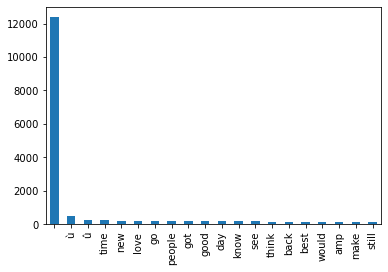

In [31]:
print("male words:",Male_Words)
Male_Words.plot(kind='bar',stacked=True)

female words:           13400
ù          1285
love        323
day         298
go          278
û           260
people      249
time        242
ü           214
know        212
got         211
new         208
â           204
amp         203
want        199
âù          195
best        192
last        179
back        173
good        168
dtype: int64


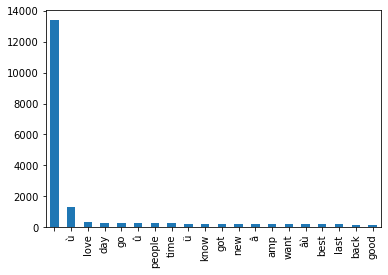

In [32]:
Female_Words.plot(kind='bar',stacked=True)
print("female words:",Female_Words)

brand words:            11884
weather     2279
channel     1169
updates     1147
û            442
new          247
amp          191
us           168
love         142
see          140
dtype: int64


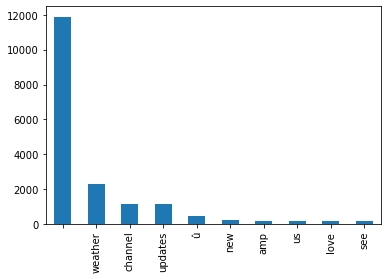

In [33]:
Brand_words.plot(kind='bar',stacked=True)
print("brand words:",Brand_words)

In [34]:
print("According to above observations most used words are:")
print("Male words: time-228, new-217, love-213, you-212 ,go-204")
print("Female words: love-321, day-291, go- 276, people-249,time-249")
print("Brand words: weather-2279, channel-1169, updates-1147")


According to above observations most used words are:
Male words: time-228, new-217, love-213, you-212 ,go-204
Female words: love-321, day-291, go- 276, people-249,time-249
Brand words: weather-2279, channel-1169, updates-1147


In [35]:
Male = df[df['gender'] == 'male']
Female = df[df['gender'] == 'female']
Brand = df[df['gender'] == 'brand']
Male_profileName = pd.Series(' '.join(Male['name'].astype(str)).lower().split(" ")).value_counts()[:1]
Female_profileName = pd.Series(' '.join(Female['name'].astype(str)).lower().split(" ")).value_counts()[:1]
Brand_profileName = pd.Series(' '.join(Brand['name'].astype(str)).lower().split(" ")).value_counts()[:1]
print("Most commonly used words in Male profile name: "+str(Male_profileName))
print("Most commonly used words in Female profile name: "+str(Female_profileName))
print("Most commonly used words in  Brand profile name: "+str(Brand_profileName))


Most commonly used words in Male profile name: 94heskind    14
dtype: int64
Most commonly used words in Female profile name: naijama    18
dtype: int64
Most commonly used words in  Brand profile name: tudosobrequase    29
dtype: int64


In [36]:
import matplotlib.pyplot as plt

female     6700
male       6194
brand      5942
unknown    1117
0            97
Name: gender, dtype: int64
<function show at 0x000001BD5F086700>


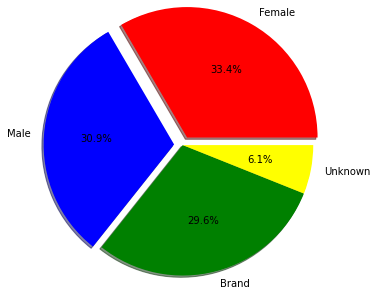

In [37]:
values_of_gender =df.gender.value_counts()
print(values_of_gender)
labels = ['Female', 'Male', 'Brand', 'Unknown']
sizes = [6700,6194,5942,1214]
colors = ['red','blue','green','yellow']
explode = (0.1,0.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%2.1f%%', shadow =True, radius =1.5)
print(plt.show)


1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender_confidence, Length: 923, dtype: int64
13952
6098
<function show at 0x000001BD5F086700>


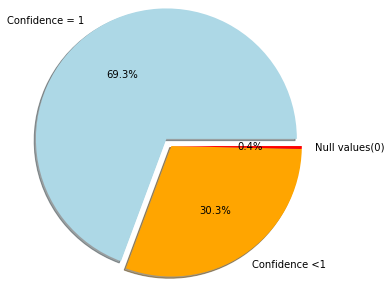

In [38]:
values_of_confidence = df.gender_confidence.value_counts()

print(values_of_confidence)
values1 = 13952
values0 = 71
values_lessthan1 = len(df.gender_confidence) - values1
print(values1)
print(values_lessthan1)

labels = ['Confidence = 1' , 'Confidence <1','Null values(0)']
sizes = [values1, values_lessthan1, values0]
colors = ['lightblue','orange','red']
explode = (0.1,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%2.1f%%', shadow =True, radius =1.5)
print(plt.show)


In [87]:
df=df.head(100)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [95]:
vector = CountVectorizer()
x = vector.fit_transform(df['Clean_tweet'])
y = df['gender']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(x,df['gender'])
print("X train ",X_train.shape)
print("X test ", X_test.shape)
print("Y train ", Y_train.shape)
print("Y test ", Y_test.shape)

X train  (75, 716)
X test  (25, 716)
Y train  (75,)
Y test  (25,)


In [102]:
# Random Forest Classification
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print(results.mean())

c:\python 3.8\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.29


In [109]:
model1 = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state=0)
model1.fit(X_train,Y_train)
Y_pred = model1.predict(X_test)
print(model1.score(X_test,Y_test))


0.32


In [110]:
accuracy_score(Y_test,Y_pred)

0.32

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier(n_estimators=100,max_features = 7)
model2.fit(X_train,Y_train)
Y_pred = model2.predict(X_test)
print(model2.score(X_test,Y_test))

0.28


In [112]:
accuracy_score(Y_test,Y_pred)

0.28

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [114]:
model3 = AdaBoostClassifier(n_estimators=30, random_state=7)
model3.fit(X_train,Y_train)
Y_pred = model3.predict(X_test)
print(model2.score(X_test,Y_test))

0.32


In [115]:
accuracy_score(Y_test,Y_pred)

0.32

In [116]:
from sklearn.ensemble import VotingClassifier

In [120]:
estimators = []
model1 = RandomForestClassifier()
estimators.append(('logistic', model1))
model2 = ExtraTreesClassifier()
estimators.append(('cart', model2))
model3 = AdaBoostClassifier()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.2700000000000001
